<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-2023/blob/main/YOLOv8_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

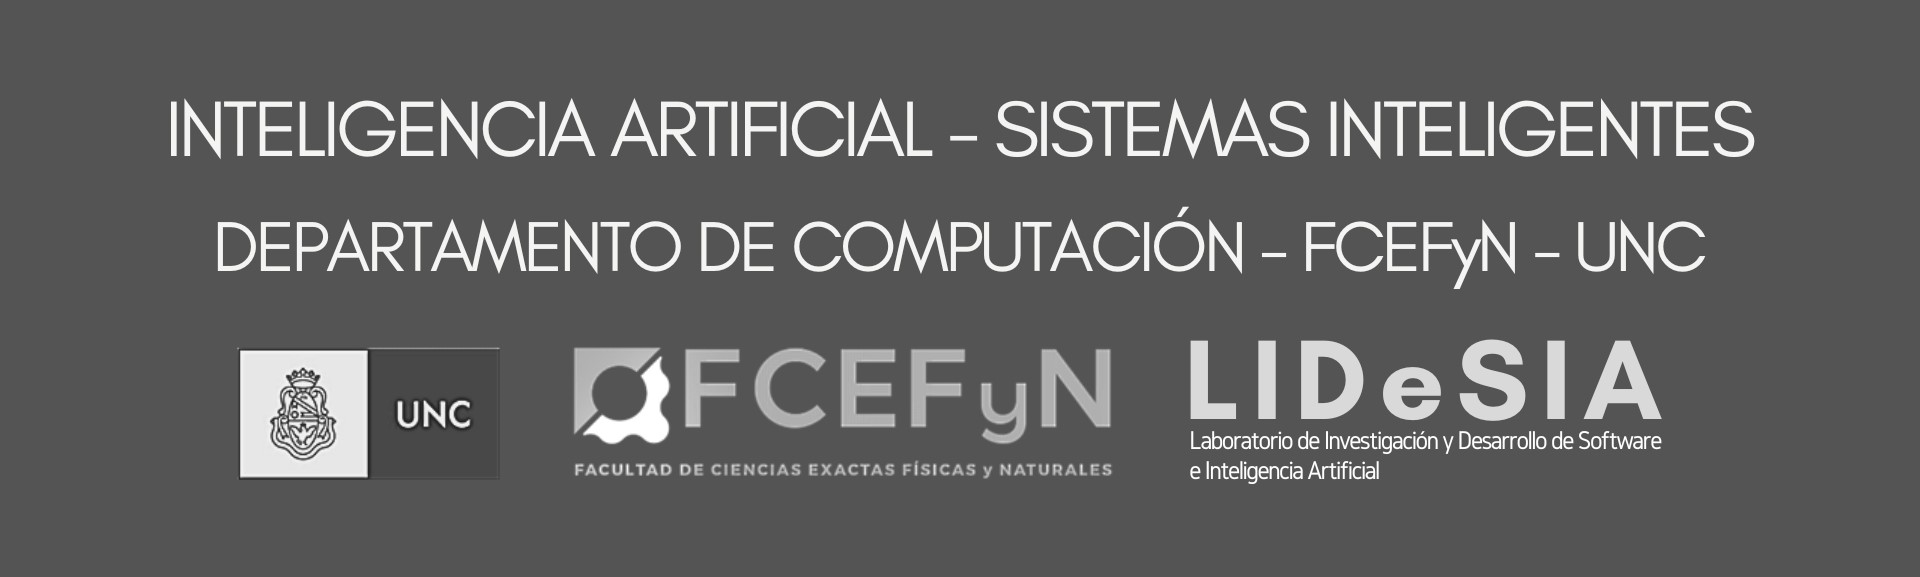

# **YOLO**
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

---

*   Autor/es: Lourdes Aybar (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

---





# <center> IMPLEMENTACIÓN YOLOV8 </center>
**YOLO**, que significa "You Only Look Once" (Solo Miras una Vez), es un algoritmo de detección de objetos utilizado en visión por computadora. El objetivo principal es detectar y localizar objetos en una imagen o en un flujo de video en tiempo real. El resultado que devuelve es una lista de objetos detectados, junto con sus coordenadas de cuadro delimitador, las clases a las que pertenecen y las puntuaciones de confianza asociadas.

**YOLOv8** es la última versión del modelo desarrollado por Ultralytics. Está diseñado para mejorar las versiones anteriores de YOLO al aumentar la precisión y velocidad de detección de objetos mientras reduce la cantidad de cálculo requerido.



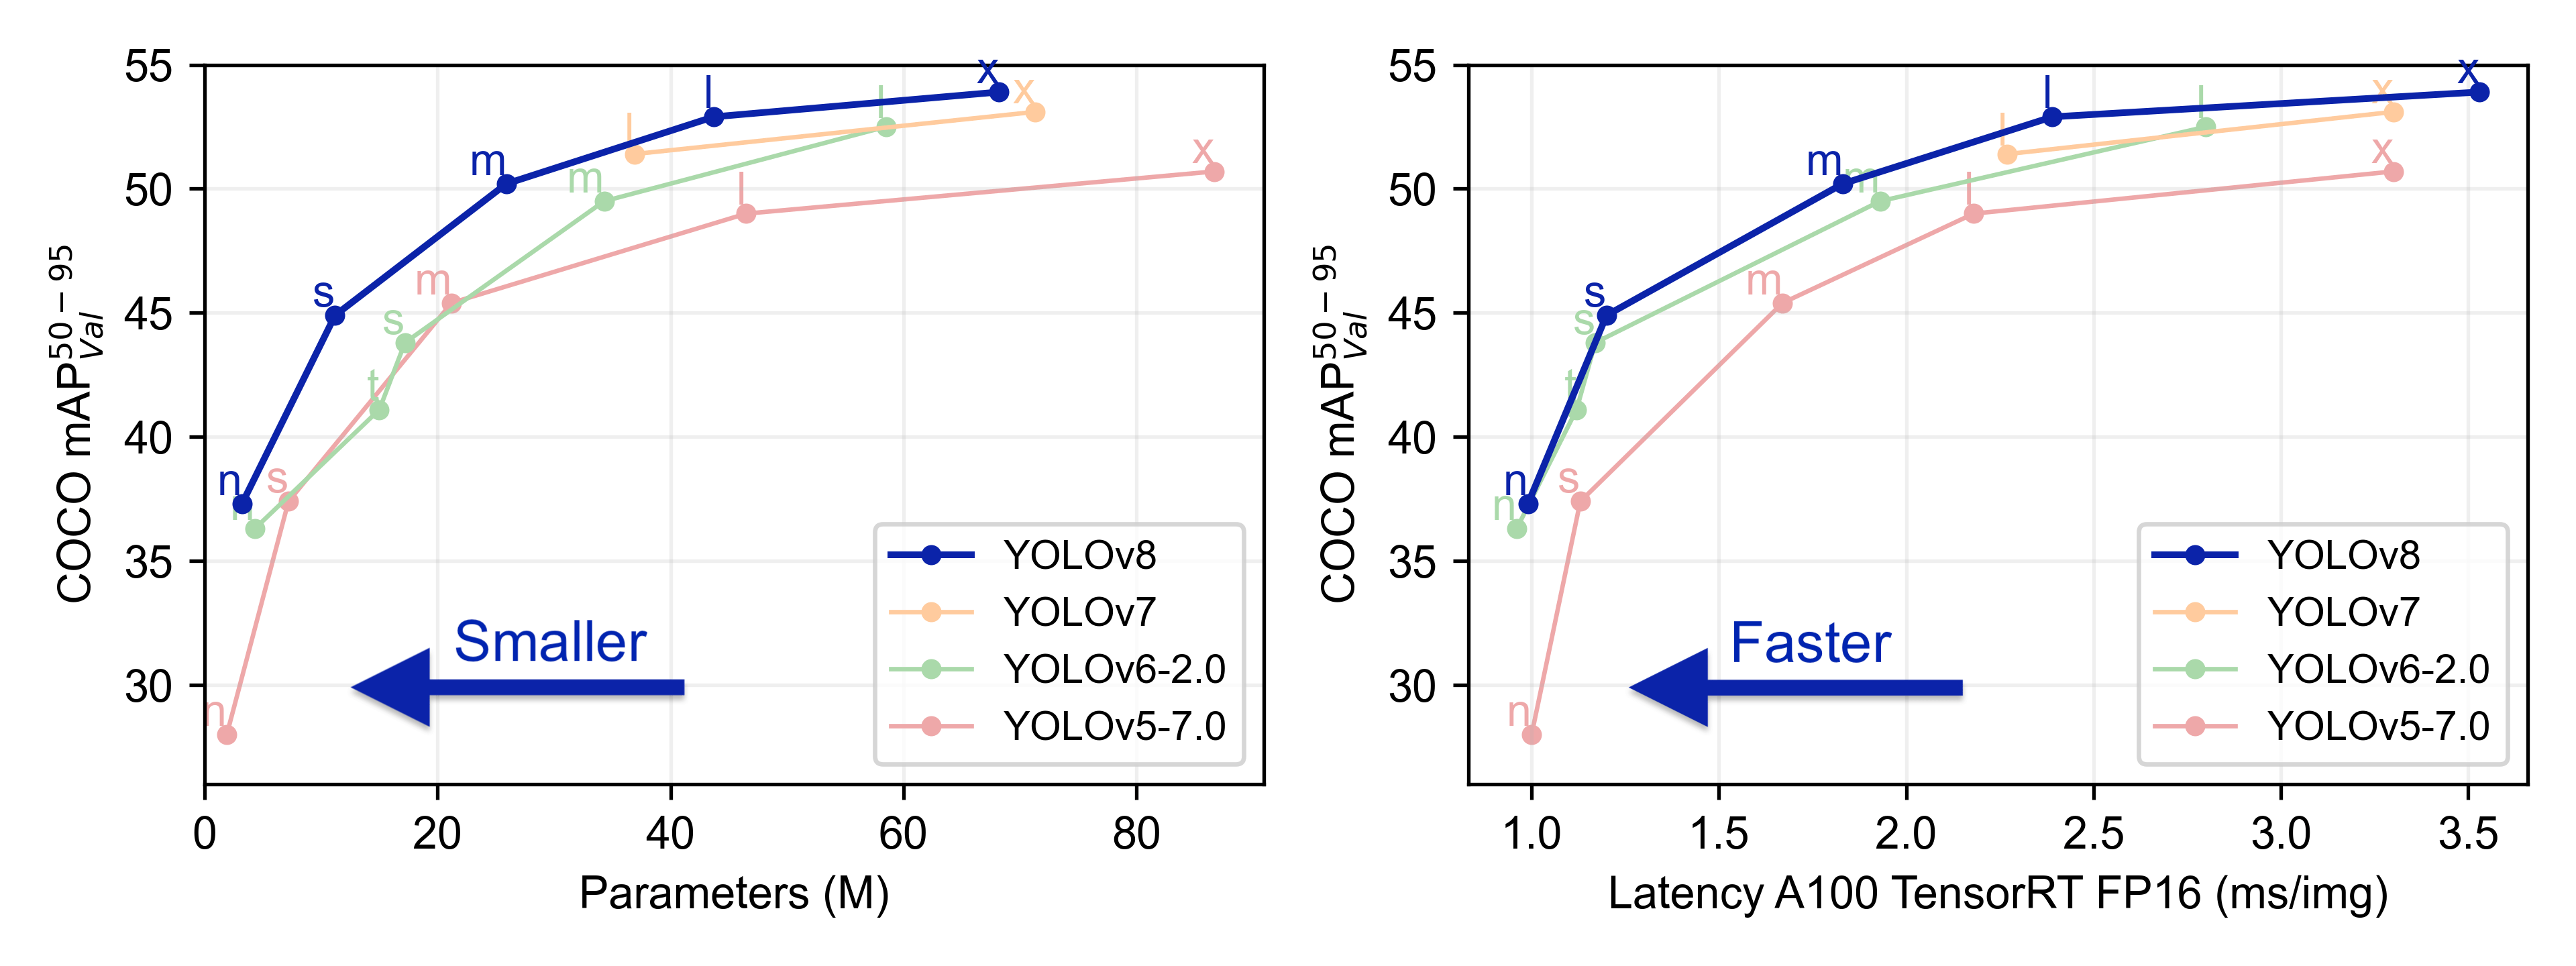

Página oficial Ultralytics:

https://ultralytics.com/

https://docs.ultralytics.com/

https://docs.ultralytics.com/tasks/detect/

Repositorio Oficial de YOLO v8:

https://github.com/ultralytics/ultralytics.git

https://github.com/ultralytics/ultralytics/tree/main

https://github.com/ultralytics/ultralytics/blob/main/requirements.txt

---

#**Transfer Learning**

***Pre entrenado***

Los modelos **YoloV8** de detección y segmentación se entrenan previamente en el conjunto de datos de COCO, mientras que los modelos de clasificación se entrenan previamente en el conjunto de datos de ImagenNet.

**COCO (Common Objects in Context):** COCO es un conjunto de datos muy utilizado para la detección de objetos. Contiene más de 200,000 imágenes etiquetadas con 80 clases de objetos diferentes, incluyendo personas, automóviles, animales, objetos domésticos, etc.

https://cocodataset.org/

https://docs.ultralytics.com/datasets/detect/coco/#dataset-yaml



# **Implementación YOLOV8 sobre nuestros Datos**

* **Recopilar**

* **Etiquetar**

    https://github.com/heartexlabs/labelImg

    https://roboflow.com/model/yolov8

* **Separar datos para entrenamiento, validación y pruebas**

* **Preparar archivo de configuración**

   *YAML*

* **Entrenar**

* **Validar**

* **Evaluación de métricas**

* **Pruebas**


---



In [ ]:
!nvidia-smi

Thu Oct 19 13:02:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import display, Image

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
#importamos  a YOLO de ultralytics




---


# **TRAIN**


---

In [ ]:
#Entrenamiento
#pueden probar con otro modelo - acceder a ultralytics para ver el nombre y lo llaman en esta celda con la variable model
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/data.yaml epochs=25 imgsz=224 plots=True save=true

100% 21.5M/21.5M [00:00<00:00, 32.8MB/s]
Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, 

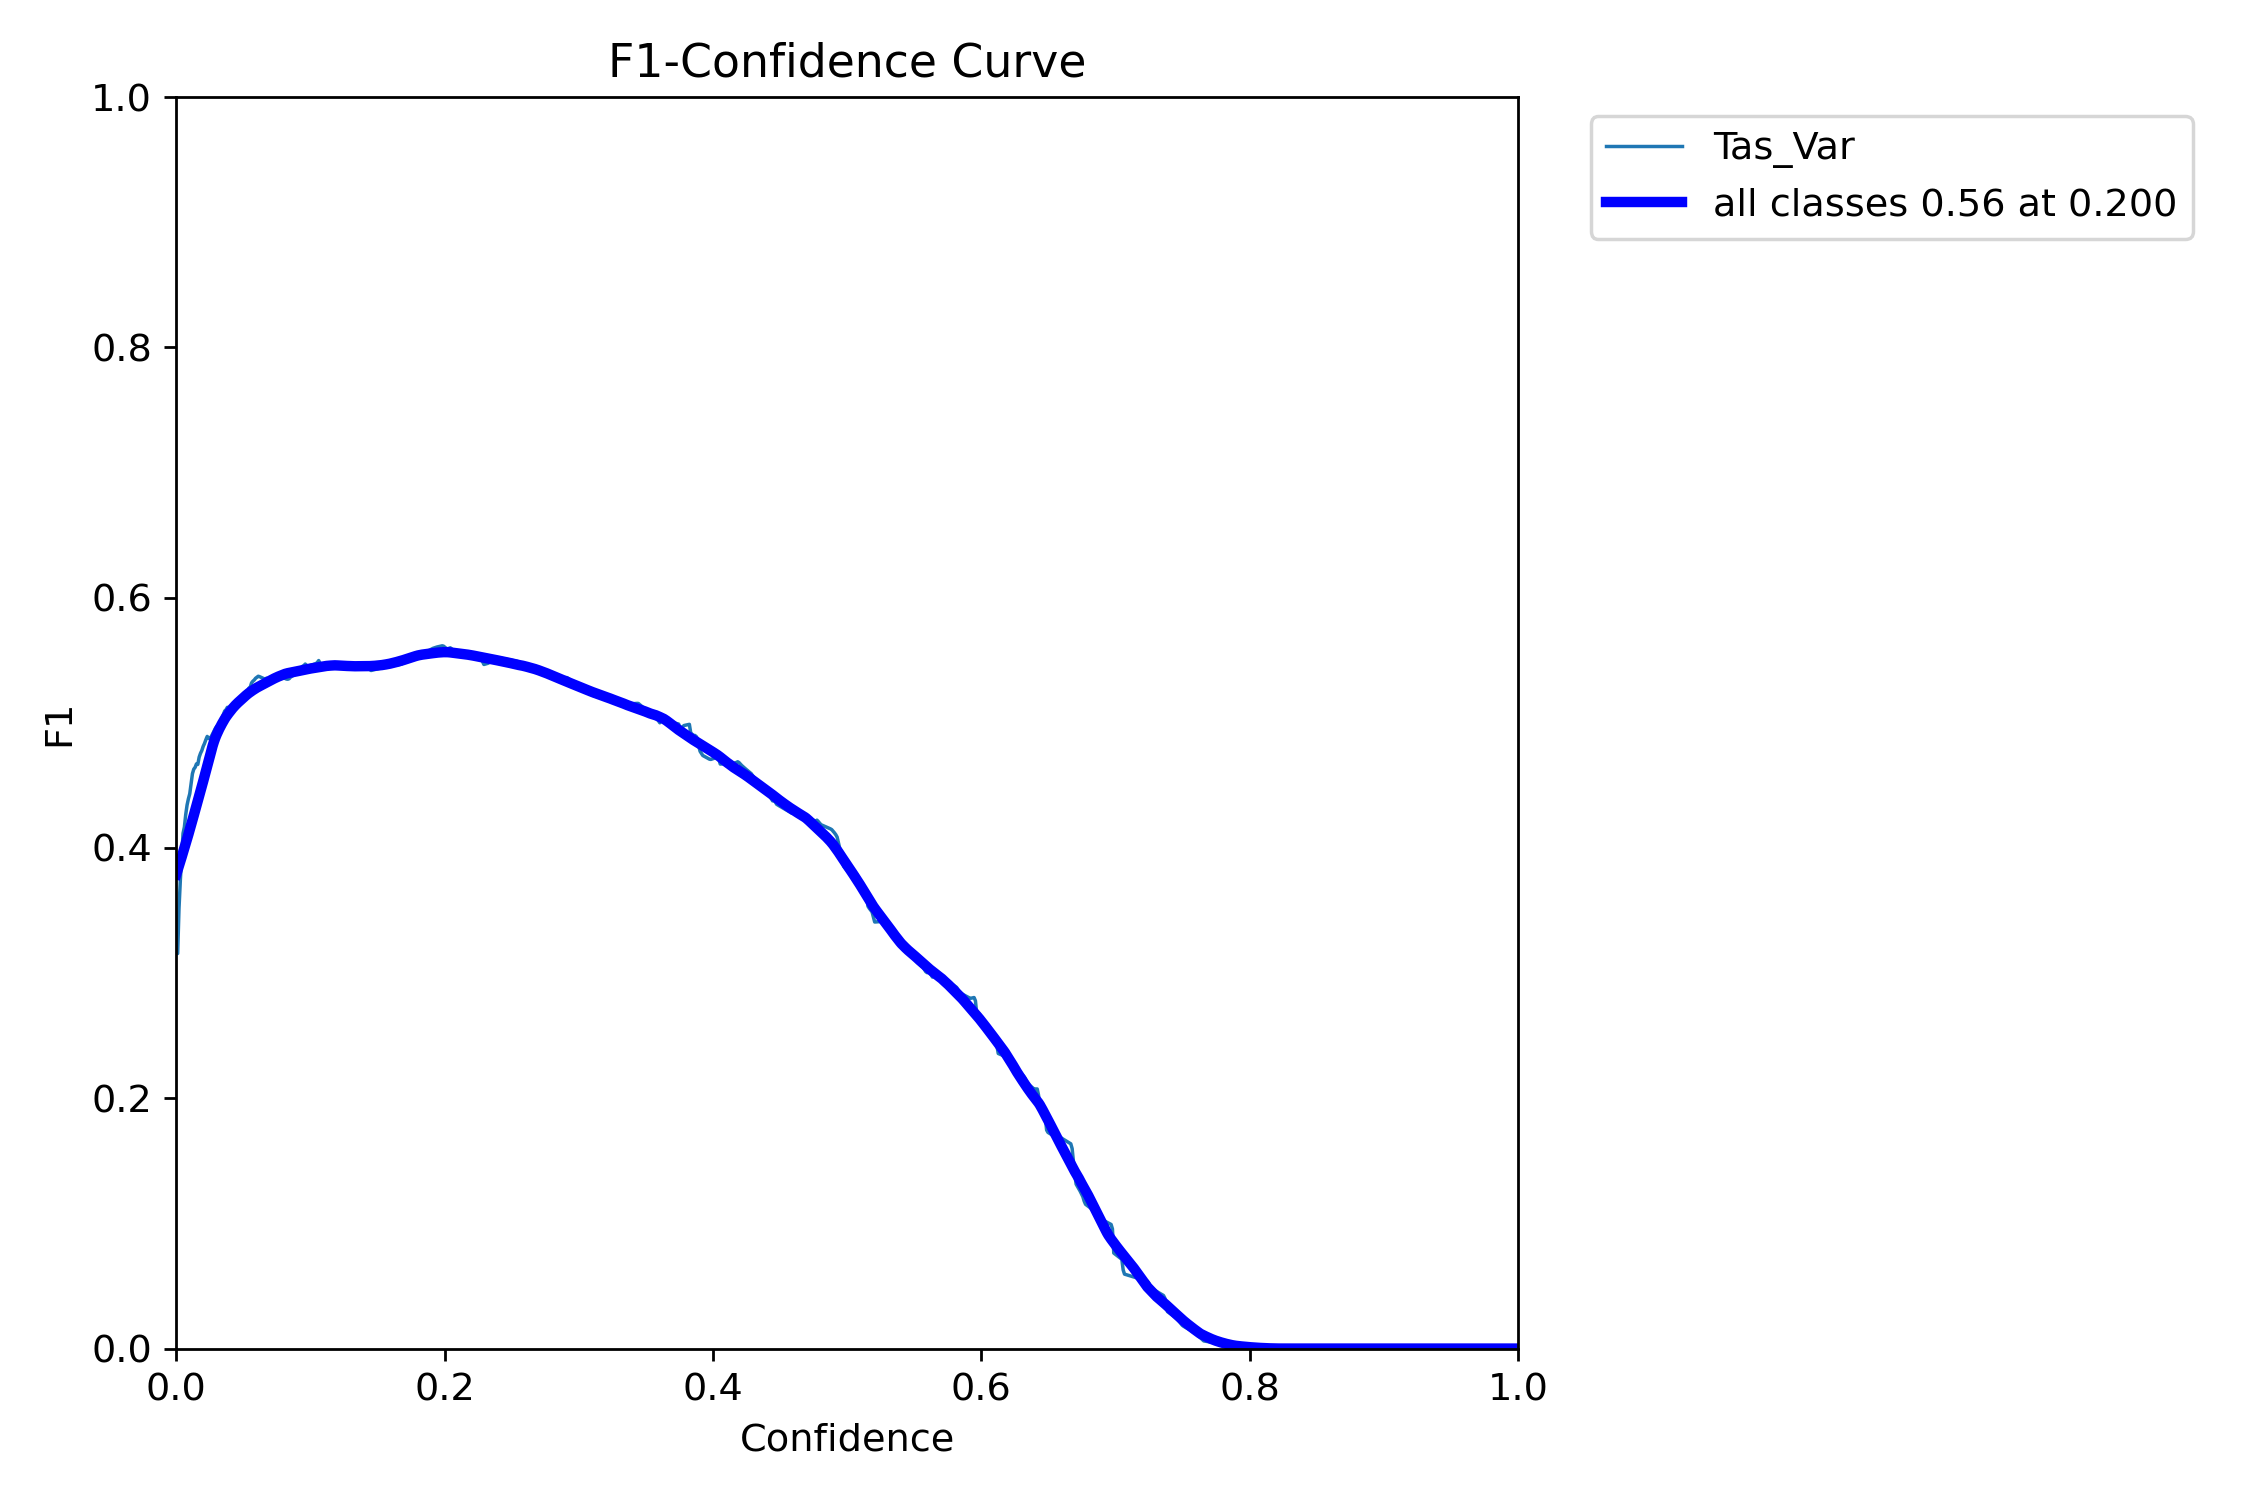

In [ ]:
Image(filename='/content/runs/detect/train/F1_curve.png', width=600)

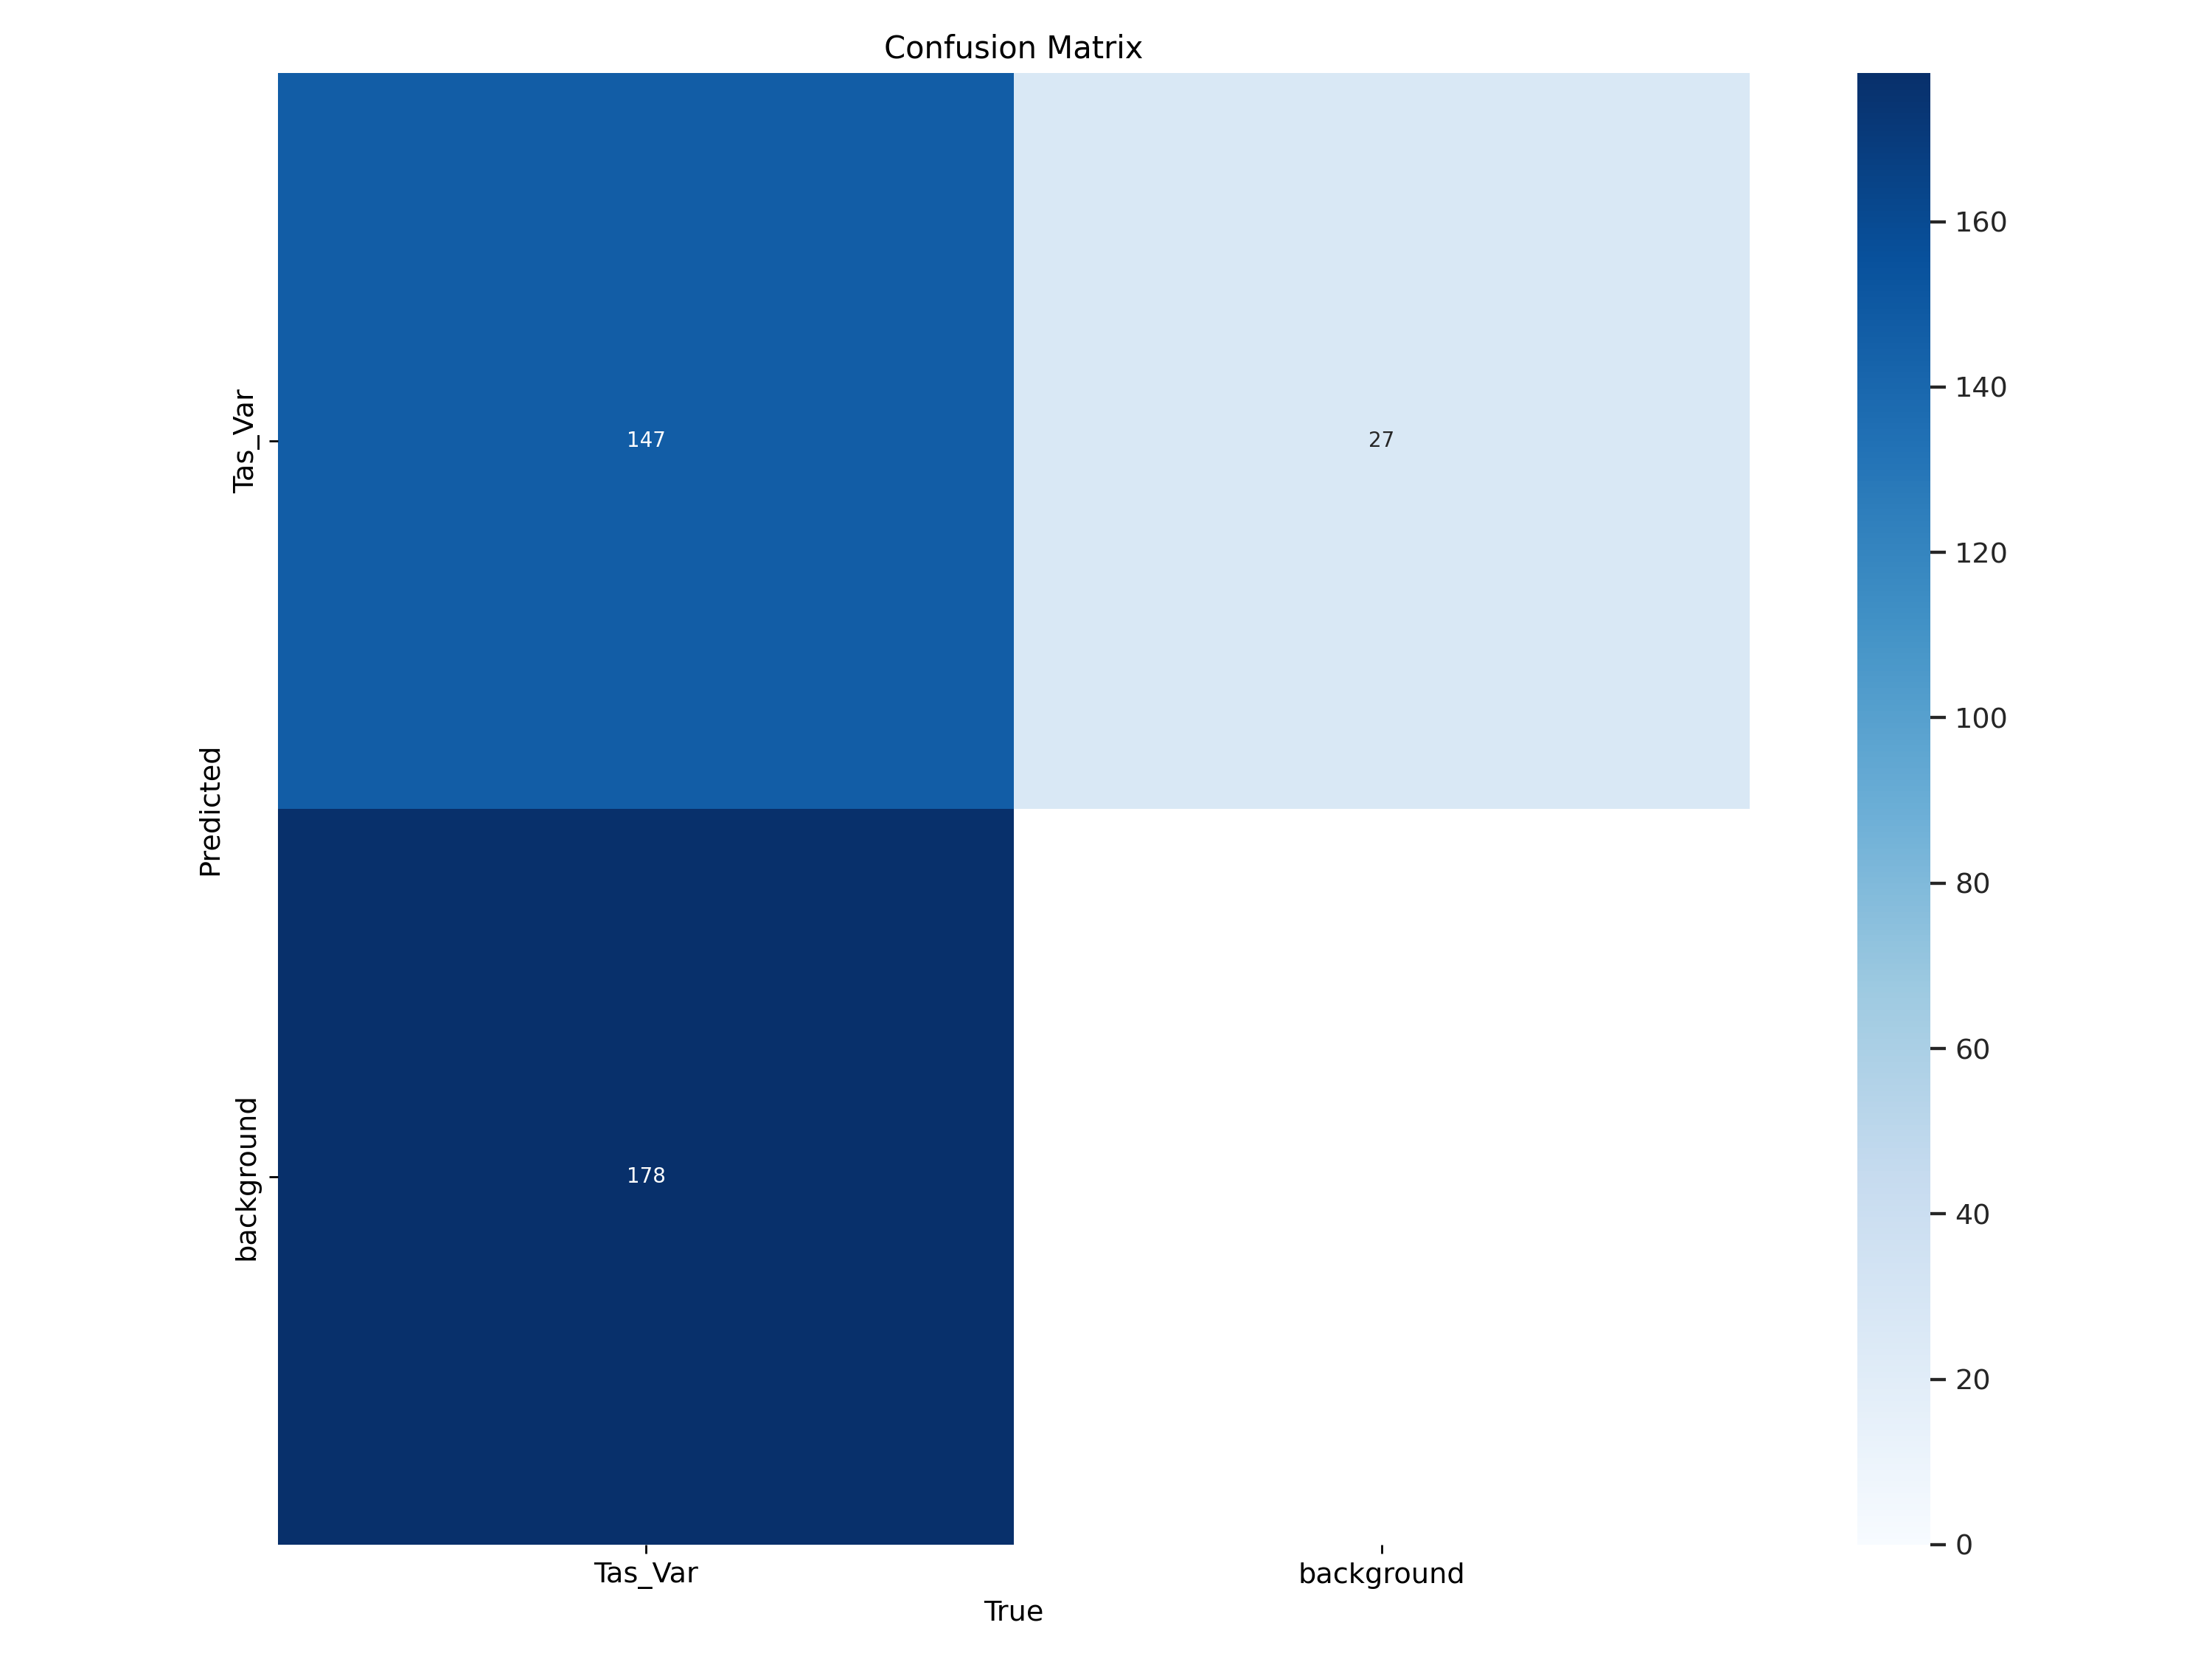

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)



---


# **VAL**


---

In [ ]:
#Validación del modelo
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/data.yaml

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100% 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.09it/s]
                   all        123        325      0.712      0.434      0.479       0.19
Speed: 0.3ms preprocess, 9.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


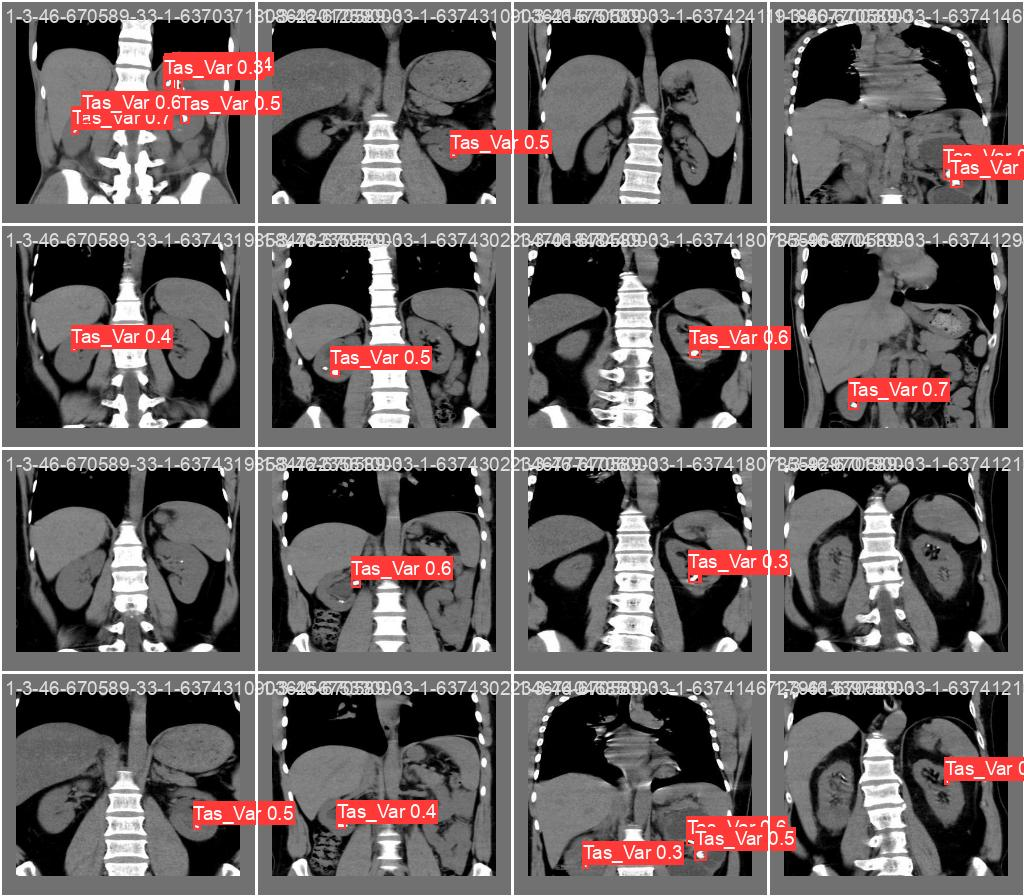

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)



---


# **TEST**


---


In [ ]:
!ls /content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/test #nos posicionamos en la carpeta test

images	labels


In [ ]:
#Test
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/test/images'

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/123 /content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/test/images/1-3-46-670589-33-1-63703718086120120200001-5487554579919763006_png_jpg.rf.9fd67251e99a47dbe83a5db6efe6c016.jpg: 192x224 1 Tas_Var, 62.2ms
image 2/123 /content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/test/images/1-3-46-670589-33-1-63705534438365105500001-5275982036206127404_png_jpg.rf.365c4daf2b772012fe47e07b9daec86e.jpg: 192x224 1 Tas_Var, 8.4ms
image 3/123 /content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/test/images/1-3-46-670589-33-1-63705540012666937300001-5673688970564737961_png_jpg.rf.15cca2fecc5f56865de3eb405476b90d.jpg: 192x224 1 Tas_Var, 12.9ms
image 4/123 /content/drive/MyDrive/Datasets/YOLOV8_calculos_renal/data/test/images/1-3-46-670589-33-1-63705542123217653900001-5305208767418446842_png_jpg.rf.d6f32a0ac81

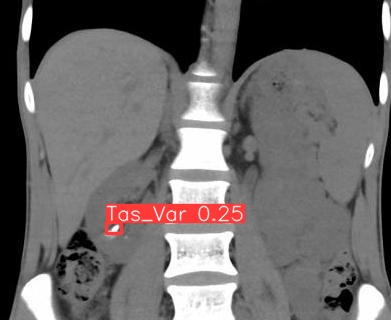

In [ ]:
Image(filename='/content/runs/detect/predict/1-3-46-670589-33-1-63703718086120120200001-5487554579919763006_png_jpg.rf.9fd67251e99a47dbe83a5db6efe6c016.jpg', width=600)

In [ ]:
!ls runs  #nos posicionamos en la carpeta runs

detect


In [ ]:
# con esta celda guardamos la carpeta runs en nuestra carpeta de preferencia
source_folder = '/content/runs'
destination_folder = '/content/drive/MyDrive/Datasets/YOLOV8_calculos_renal'


!cp -r $source_folder $destination_folder

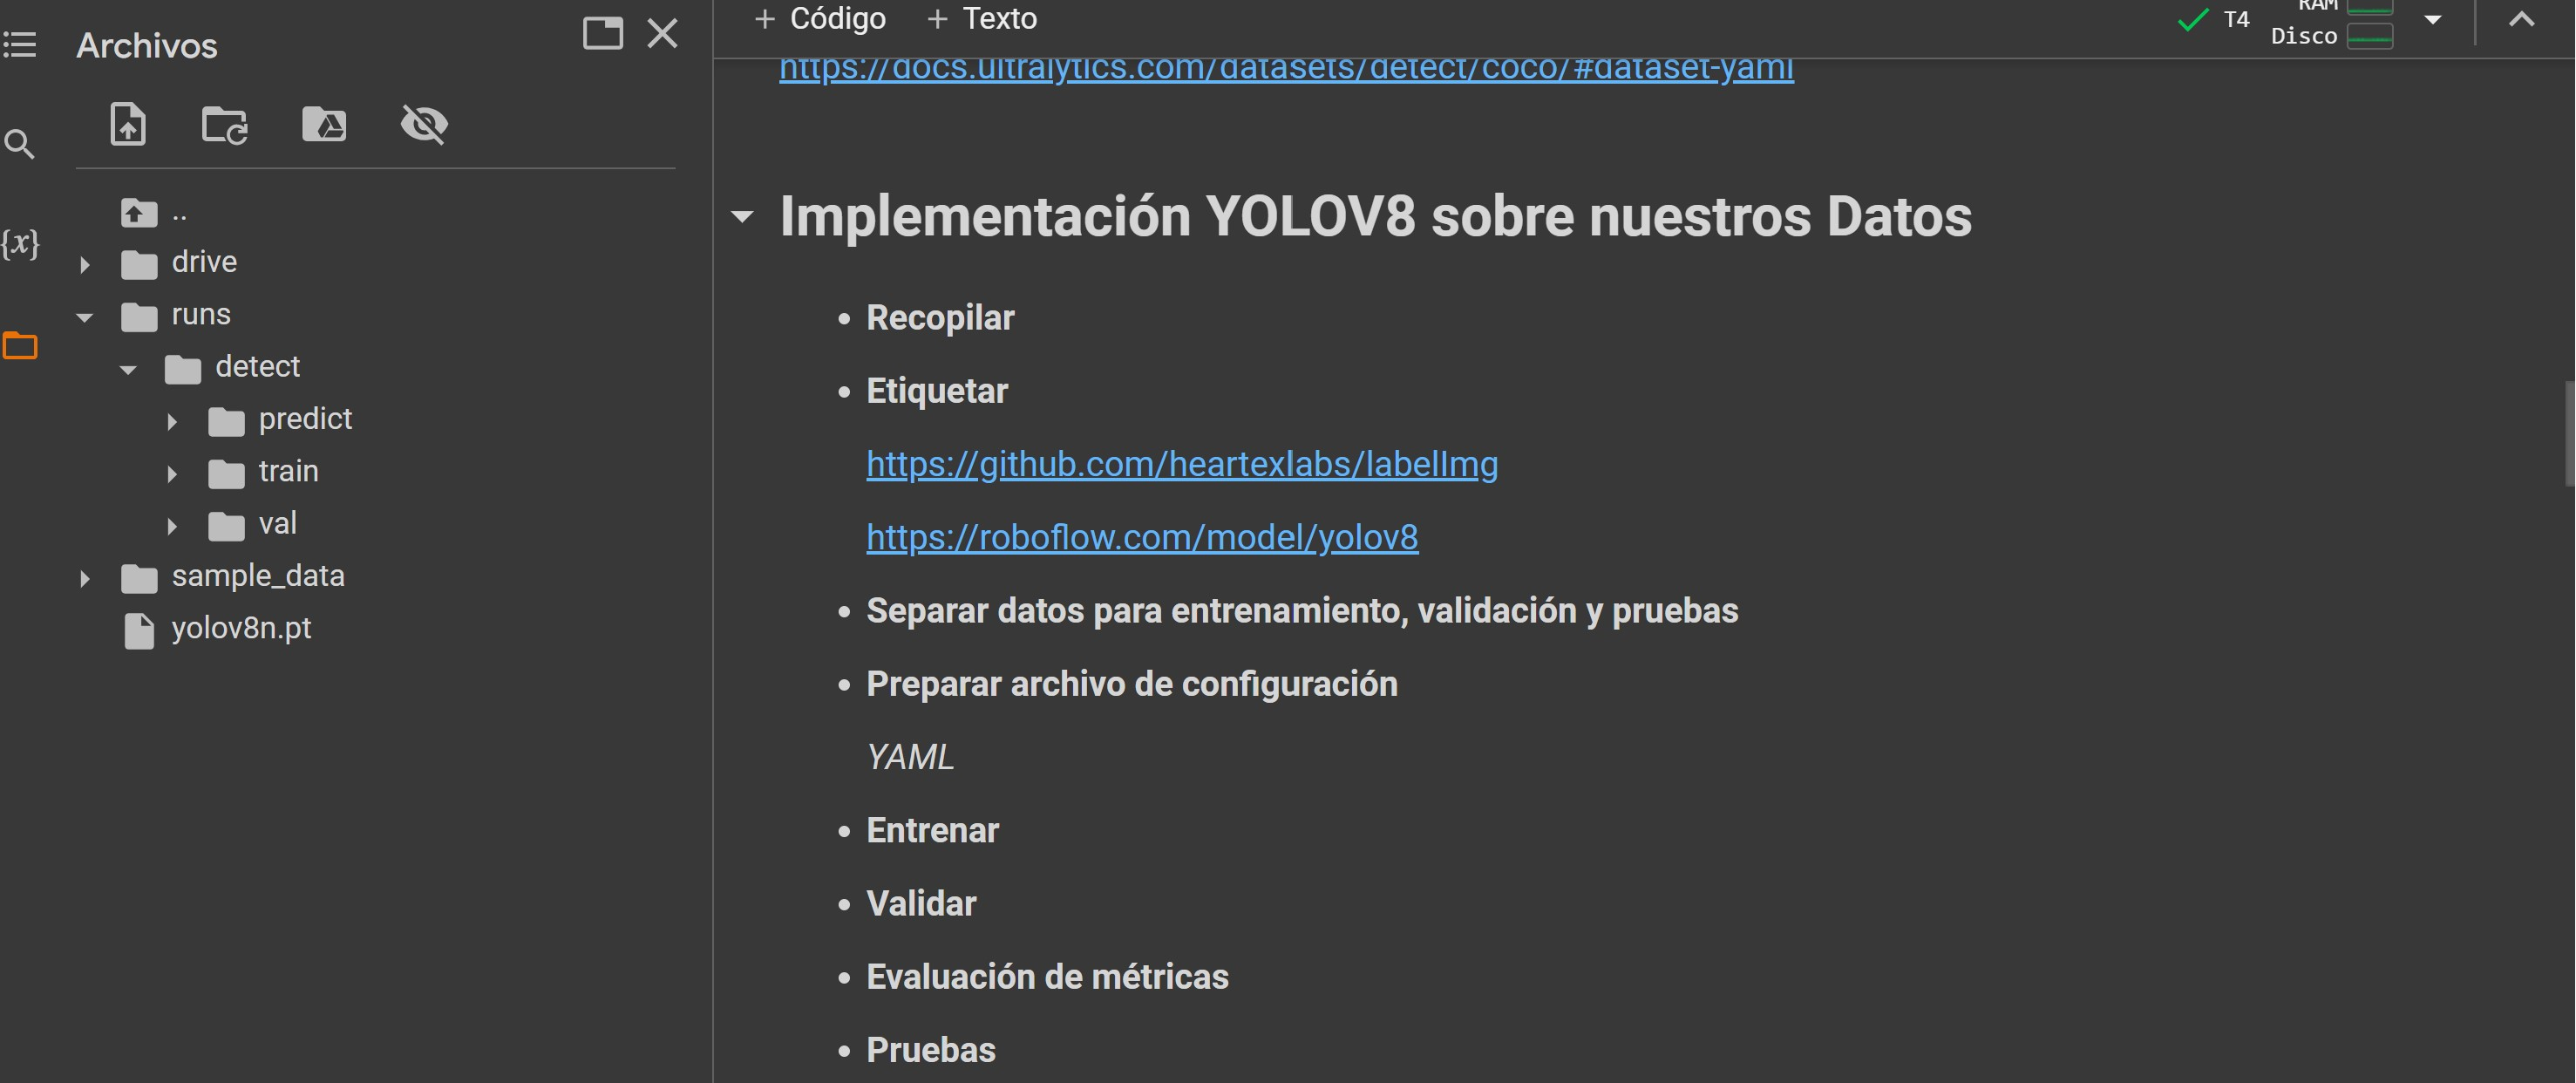

In [ ]:
# @title
Image(filename='/content/drive/MyDrive/Datasets/correcto.jpg', width=600)




---


# Video Clase de la presente implementación de YoloV8 (segundo semestre 2023):

https://drive.google.com/file/d/1QsHtq2KVMTdM9bNOcHd9Cci6axz58B9g

**Objetivo** : mejorar resultados de entrenamiento y validación, consecuentemente debe obtener mejores pruebas.

1. ¿Más entrenamiento?


2. ¿Mejora variando los pesos del Modelo pre entrenado?

Observar métricas






---


**Data set**

Base de Datos Colab actual Cálculos renales:

https://drive.google.com/drive/folders/1zCMPD1WaYQMvC7YbcBeYLaSVoMpmmzSr


url: https://universe.roboflow.com/tez-nwkf5/tez_roi_aug/dataset/3



